In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 6]
matplotlib.rc('font', size=20)
matplotlib.rc('font', family='serif')
matplotlib.rc('figure', figsize=(12, 6))
matplotlib.rc('lines', linewidth=2.5,linestyle="-.")
matplotlib.rc('lines', markersize=10)
matplotlib.rc('figure.subplot', hspace=.4)

from gaussian import Gaussian
from hagedorn import Hagedorn
from partition import partition_f

In [3]:
# import wavepacket at crossing
df_params = pd.read_csv("partition_unity_hagedorn_wavepacket_parameters.txt", 
            sep = '\t')

psi_tc = Gaussian(df_params['q[0]'].values, 
            df_params['p[0]'].values, 
            df_params['Q[0].re'].values + 1j*df_params['Q[0].im'].values, 
            df_params['P[0].re'].values + 1j*df_params['P[0].im'].values,
            df_params['EPS'].values)

# read projection family of Hagedorn wavepackets
df_params_families_sigma1 = pd.read_csv("partition_unity_hagedorn_wavepacket_parameters_families_sigma1.txt", 
            sep = '\t')
df_params_families_sigma2 = pd.read_csv("partition_unity_hagedorn_wavepacket_parameters_families_sigma2.txt", 
            sep = '\t')
df_params_families_sigma3 = pd.read_csv("partition_unity_hagedorn_wavepacket_parameters_families_sigma3.txt", 
            sep = '\t')
df_params_families_sigma4 = pd.read_csv("partition_unity_hagedorn_wavepacket_parameters_families_sigma4.txt", 
            sep = '\t')

families1 = [Hagedorn(row['q[0]'], 
                     row['p[0]'], 
                     row['Q[0].re'] +  1j*row['Q[0].im'],
                     row['P[0].re'] + 1j*row['P[0].im'],
                     row['EPS'], 
                     np.array([row['c[{}].re'.format(k)] + 1j*row['c[{}].im'.format(k)] for k in range(df_params_families_sigma1['SIZE'][0])]))
                     for _, row in df_params_families_sigma1.iterrows()]
families2 = [Hagedorn(row['q[0]'], 
                     row['p[0]'], 
                     row['Q[0].re'] +  1j*row['Q[0].im'],
                     row['P[0].re'] + 1j*row['P[0].im'],
                     row['EPS'], 
                     np.array([row['c[{}].re'.format(k)] + 1j*row['c[{}].im'.format(k)] for k in range(df_params_families_sigma2['SIZE'][0])]))
                     for _, row in df_params_families_sigma2.iterrows()]
families3 = [Hagedorn(row['q[0]'], 
                     row['p[0]'], 
                     row['Q[0].re'] +  1j*row['Q[0].im'],
                     row['P[0].re'] + 1j*row['P[0].im'],
                     row['EPS'], 
                     np.array([row['c[{}].re'.format(k)] + 1j*row['c[{}].im'.format(k)] for k in range(df_params_families_sigma3['SIZE'][0])]))
                     for _, row in df_params_families_sigma3.iterrows()]
families4 = [Hagedorn(row['q[0]'], 
                     row['p[0]'], 
                     row['Q[0].re'] +  1j*row['Q[0].im'],
                     row['P[0].re'] + 1j*row['P[0].im'],
                     row['EPS'], 
                     np.array([row['c[{}].re'.format(k)] + 1j*row['c[{}].im'.format(k)] for k in range(df_params_families_sigma4['SIZE'][0])]))
                     for _, row in df_params_families_sigma4.iterrows()]
families = families4

In [4]:
df_params_families_sigma1.loc[:, 'c[0].re':'c[{}].im'.format(df_params_families_sigma1['SIZE'][0]- 1)].head(2)

,c[0].re,c[0].im,c[1].re,c[1].im,c[2].re,c[2].im,c[3].re,c[3].im,c[4].re,c[4].im,...,c[45].re,c[45].im,c[46].re,c[46].im,c[47].re,c[47].im,c[48].re,c[48].im,c[49].re,c[49].im
0,0.000094,0,0.000013,0,-0.000052,0,-0.000014,0,0.000035,0,...,-0.000001,0,0.000001,0,0.000001,0,-8.330192e-07,0,-0.000001,0
1,0.000245,0,0.000032,0,-0.000137,0,-0.000033,0,0.000092,0,...,-0.000003,0,0.000003,0,0.000004,0,-2.152445e-06,0,-0.000004,0


## Broad wavepacket at crossing

Let $t_c$ denote crossing time and consider
$$ 
    \psi(x, t_c) := (\pi \epsilon)^{-1/4} (\det Q)^{-1/2}
                    \exp\left\{\frac{i}{2\epsilon} (x - q)^TPQ^{-1}(x-q) + \frac{i}{\epsilon}p^T(x - q)
                    \right\} =: \varphi_0[\Pi]
$$
where 
$$
    \Pi =\left[q = 0, 
            p = 0, 
            Q = \sqrt{2}, 
            P \frac{I}{\sqrt{2}}\right]
$$

The variance is given by $\mathbb{Var}(\psi(x, t_c)) = \epsilon QQ^*$

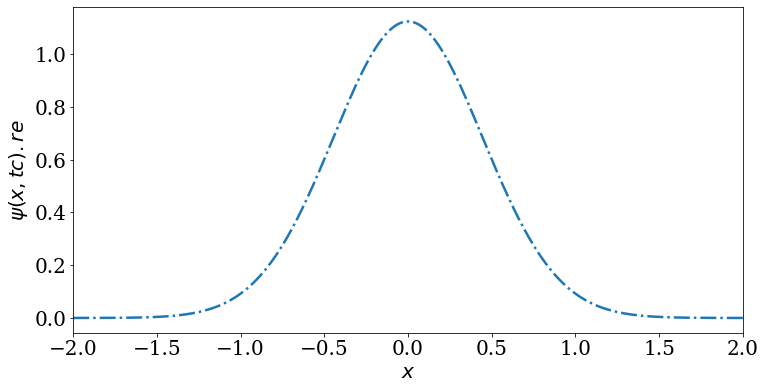

In [5]:
# generate wavepackets
x = np.linspace(psi_tc.q - 10, psi_tc.q + 10, 10**5)
plt.ylabel(r'$\psi(x,tc).re$')
plt.xlabel(r'$x$')
plt.xlim((-2,2))
plt.plot(x,psi_tc.psi(x).real)

Since the wavepacket is too broad in position space, we would like to decompose into a family of Gaussians/Hagedorn wavepackets of smaller variance:
$$
    \psi(x, t_c) \approx \sum_{q \in \Gamma_q} \sum_{k \in \mathcal{K}} a_{q,k} \varphi_k[\Pi_q]
$$
To achieve this decomposition we will consider the following approaches:

1. Partition of unity followed by a projection - this avoids inversion of matrices (see 2)
2. Projection **The problem is ill-conditioned**

    ```
    Code block
    ```
3. FBI transform ([Lasser et al. ``The Gaussian wavepacket transform via quadrature rules"](https://arxiv.org/pdf/2010.03478v1.pdf) - also based on a partition of unity of Gaussian functions)


## Partition of unity

We will consider the following parametrised function to form our partition of unity:
$$
    f(x; q, \delta) =
    \begin{cases}
        \frac{\exp\left\{-\frac{\delta/2}{-|x - q| + \delta/2} \right\} }{\exp\left\{-\frac{\delta/2}{-|x - q| + \delta/2} \right\} + \exp\left\{-\frac{\delta/2}{|x - q| } \right\}}, \hspace{1cm} \text{if} |x - q| < \frac{\delta}{2}
        \\
        0, \hspace{1cm} \text{o.w.}
    \end{cases}
$$

The following plot illustrates what they look like and that indeed sum up to 1.

(-2.0, 2.0)

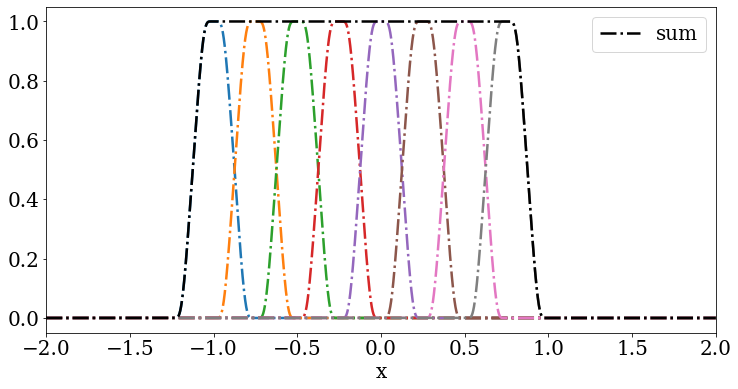

In [6]:
delta = 0.5
sum = 0
for q in np.arange(-1,1,delta/2):
    y = partition_f(x, q, delta)
    sum+=y
    plt.plot(x, y)
plt.plot(x, sum, label = 'sum', c='black')
plt.xlabel('x')
plt.legend()
plt.xlim((-2,2))

> **Fixing the grid**
> >For the moment we set the LH point of the grid $x_l$ and the RH point $x_r$ as $q - 4\sigma$ and $q + 4 \sigma$ respectively motivated by the following picture.

<img src="./normalDistribution.png" alt="normal" width="800"/>


> **Choosing $\delta$** 
>> The choice of $\delta$ will affect the accuracy of the Superadiabatic formula. The smaller we choose the variance the better the accuracy but obviously at a cost of having a larger number of wavepackets to 
deal with. For the moment we will set 
$$
    \delta = 0.5 * \sqrt{\mathbb{Var}[\psi(x,tc)]} = 0.5 \sqrt{\epsilon QQ^*}
$$

Once chosen $x_l, x_r, \delta$ we can determine the nodes $q \in \Gamma_q$:
$$ q_i = x_l + i\delta/2, \hspace{1cm} i \in \left\{0, 1, ..., int\left(\frac{x_r - x_l}{\delta/2}\right)\right\}$$

Hence, we can now express our incoming wavepacket $\psi(x,t_c)$ as a linear combination of these partition functions:
\begin{align}
    \psi(x,t_c) &= 
    \psi(x, t_c) * 1 
    \\
    &\approx
    \sum_{q \in \Gamma_q}
    \psi(x,t_c) * f(x; q, \delta)
    \tag{1}
\end{align}

/home/s1992054/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


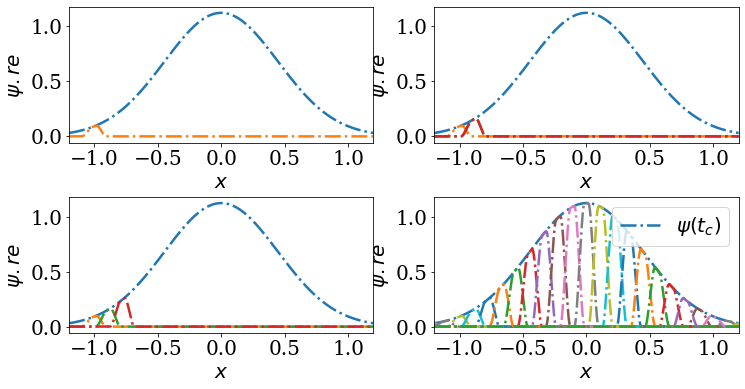

In [7]:
var = (psi_tc.eps * np.real((psi_tc.Q*np.conj(psi_tc.Q))))[0] 
delta = 0.5*np.sqrt(var)

fig, ax = plt.subplots(2,2)

ax[0,0].plot(x, psi_tc.psi(x).real, label = r'$\psi(t_c)$')
ax[0,1].plot(x, psi_tc.psi(x).real, label = r'$\psi(t_c)$')
ax[1,0].plot(x, psi_tc.psi(x).real, label = r'$\psi(t_c)$')
ax[1,1].plot(x, psi_tc.psi(x).real, label = r'$\psi(t_c)$')
ax[0,0].plot(x, (psi_tc.psi(x) * partition_f(x, families[7].q, delta)).real)
ax[0,1].plot(x, (psi_tc.psi(x) * partition_f(x, families[7].q, delta)).real)
ax[0,1].plot(x, (psi_tc.psi(x) * partition_f(x, families[8].q, delta)).real)
ax[1,0].plot(x, (psi_tc.psi(x) * partition_f(x, families[7].q, delta)).real)
ax[1,0].plot(x, (psi_tc.psi(x) * partition_f(x, families[8].q, delta)).real)
ax[1,0].plot(x, (psi_tc.psi(x) * partition_f(x, families[9].q, delta)).real)
ax[0,1].plot(x, (psi_tc.psi(x) * partition_f(x, families[8].q, delta)).real)

for Hag in families:
    ax[1,1].plot(x, (psi_tc.psi(x) * partition_f(x, Hag.q, delta)).real)
plt.legend()
plt.setp(ax, xlim=(-1.2, 1.2), xlabel=r'$x$', ylabel = r'$\psi.re$')
plt.show()

Make a table with the different values of sigma and the variance...

Now, the aim is to project each term in (1) - $ \psi(x, t_c) f(x; q, \delta) $ - onto a family of Hagedorn wavepackets centered at $ q $ and with smaller variance. Precisely, 
$$ 
    \psi(x, t_c) f(x; q, \delta) \approx \sum_{k \in \mathcal{K}} a_{qk} \varphi_{k}[\Pi_q]
$$
where 
$$ \Pi_q = \left[ q_q=q, p_q=p_{t_c}, Q_q = \frac{1}{\sqrt{\epsilon}} \frac{\delta}{2 \sigma}, P_q = \frac{i}{Q} \right]$$
so that $$ \mathbb{Var}[\varphi_0[\Pi_q]] = \epsilon Q_q Q_q^* = \left(\frac{\delta}{2 \sigma}\right)^2 $$

By changing the value of $\sigma$ we change to what extent the "support" of $\varphi_0[\Pi_q]$ matches the support of $\psi(x, t_c) f(x; q, \delta)$. 
In particular, 
- If we consider the "support" of $\varphi_0[\Pi_q]$ to be $4 standard deviations$, then the ideal value of $\sigma$ should be 
$$ 4 \frac{\delta}{2 \sigma} = \delta / 2 \rightarrow \sigma = 4 $$

Now, the coefficient $a_{qk}$ is given by 

\begin{align*}
    a_{qk} 
    &=
    \left\langle 
        \text{ }
        \varphi_k[\Pi_q],
        \text{ }
         f(x; q, \delta) \psi(x, t_c)
        \text{ }
    \right\rangle
    \\
    &=
    \left\langle 
        \text{ }
        H_k[\Pi_q]
        \varphi_0[\Pi_q],
        \text{ }
         f(x; q, \delta) \psi(x, t_c)
        \text{ }
    \right\rangle
\end{align*}

We will consider a Gaussian as incoming wavepacket and so 

\begin{align*}
    a_{qk} 
    &=
    \left\langle 
        \text{ }
        H_k[\Pi_q]
        \varphi_0[\Pi_q],
        \text{ }
         f(x; q, \delta) \varphi_0[\Pi_{t_c}]
        \text{ }
    \right\rangle
    \\
    &=
    \int_{\mathbb{R}}
    \overline{
    H}_k[\Pi_q]
    \overline{\varphi}_0[\Pi_q]
    \varphi_0[\Pi_{t_c}]
    f(x; q, \delta)
    dx
\end{align*}

The product of the two Gaussian is given in [Lasser et al. ``An error representation for the time-sliced thawed Gaussian propagation method"](https://arxiv.org/pdf/2108.12182.pdf) and the sum of the 
exponents is given by 
\begin{align*}
    \frac{i}{\epsilon}
    \left(
        \frac{1}{2}
        (x - q_q)^T
        B    
        (x - q_q)
        + 
        (x - q_q)^Tb
        + 
        c
    \right)
\end{align*}
where 
\begin{align*}
    B = (P_qQ^{-1}_q) - \overline{P_{t_c}Q_{t_c}^{-1}}
    \hspace{1cm}
    b = (p_q - p_{t_c}) - \overline{P_{t_c}Q_{t_c}^{-1}} (q_q - q_{t_c})
    \\
    c = - \frac{1}{2}(q_q - q_{t_c})^T\overline{P_{t_c}Q_{t_c}^{-1}}(q_q - q_{t_c}) - p_{t_c}^T(q_q - q_{t_c})
\end{align*}

Rewriting the integral for $a_{qk}$ in a form suitable for GH quadrature rules 
$$ a_{qk}
=
( \pi \epsilon )^{-1/2}
\text{det}
\left(
    Q_q
\right)^{-1/2}
\text{det}
\left(
    Q_{t_c}
\right)^{-1/2}
\exp\left\{ 
        \frac{i}{\epsilon} c 
    \right\}
\int_{\mathbb{R}} h(x) w(x) dx$$

where 
$$  
    w(x) 
    =
    \exp
    \left\{
        - \frac{1}{2\epsilon} 
        (x - q_q)^T \Im(B) (x - q_q)
    \right\}
$$

and 

$$ 
    h(x) 
    =
    \overline{H}_k[\Pi_q]
    f(x; q, \delta)
    \exp
    \left\{
        \frac{i}{2\epsilon} 
        (x - q_q)^T \Re(B) (x - q_q)
    \right\}
     \exp
    \left\{
        \frac{i}{\epsilon} 
        (x - q_q)^T b
    \right\}
$$

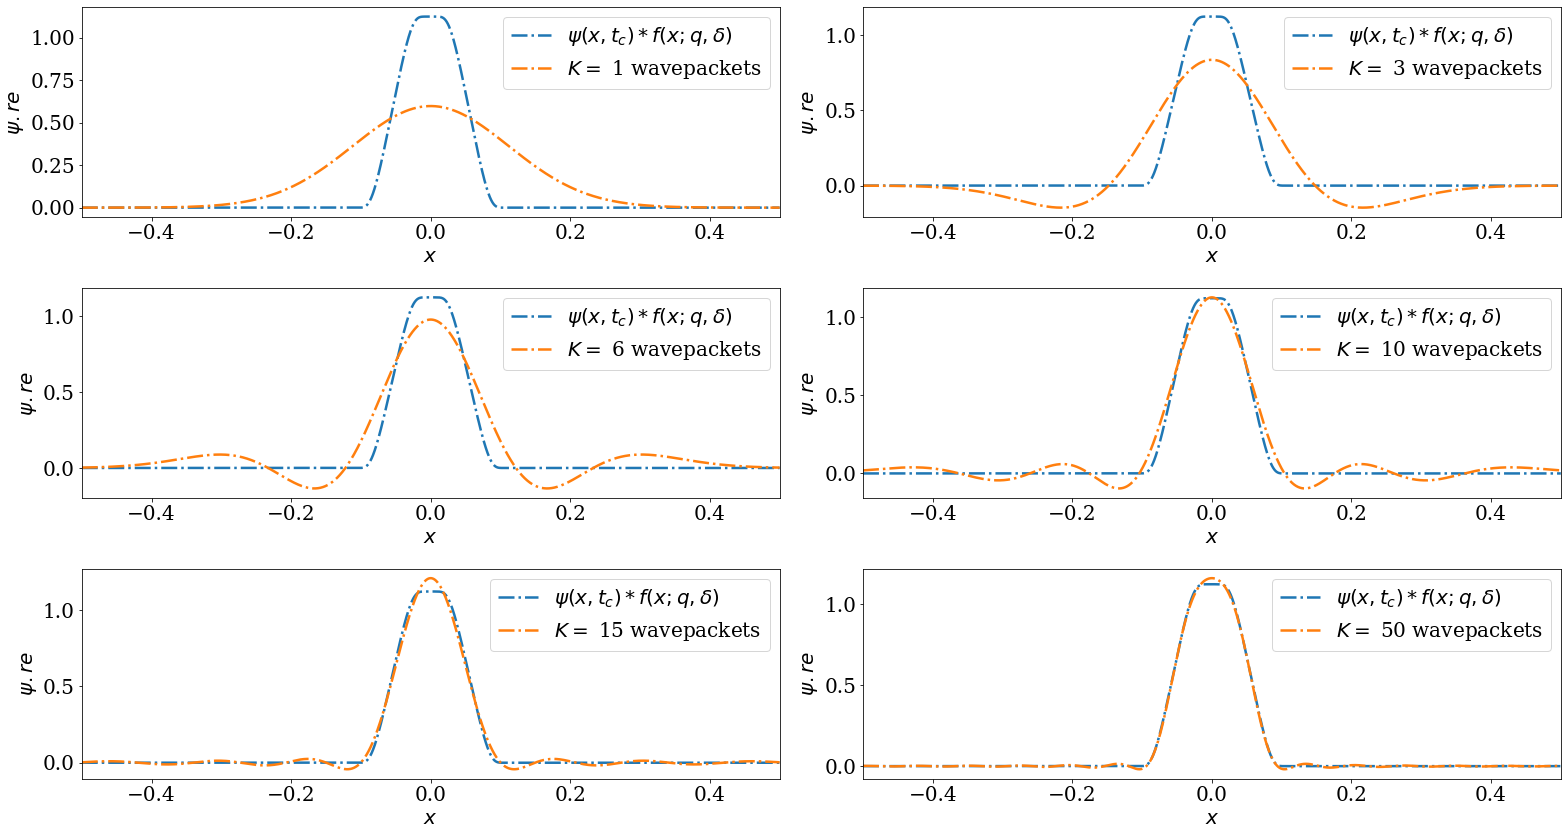

In [20]:
fig, ax = plt.subplots(3,2, figsize = (22,12))
famc = families1[16]
ax[0,0].plot(x, (psi_tc.psi(x) * partition_f(x, famc.q, delta)).real, label = r'$\psi(x,t_c)*f(x; q, \delta)$')
ax[0,0].plot(x, famc.psi(x,1).real, label = r'$K =$ {} wavepackets'.format(1)) # plot it as a function of the number of wavepackets for different values of variance
ax[0,1].plot(x, (psi_tc.psi(x) * partition_f(x, famc.q, delta)).real, label = r'$\psi(x,t_c)*f(x; q, \delta)$')
ax[0,1].plot(x, famc.psi(x,3).real, label = r'$K =$ {} wavepackets'.format(3)) # plot it as a function of the number of wavepackets for different values of variance
ax[1,0].plot(x, (psi_tc.psi(x) * partition_f(x, famc.q, delta)).real, label = r'$\psi(x,t_c)*f(x; q, \delta)$')
ax[1,0].plot(x, famc.psi(x,6).real, label = r'$K =$ {} wavepackets'.format(6)) # plot it as a function of the number of wavepackets for different values of variance
ax[1,1].plot(x, (psi_tc.psi(x) * partition_f(x, famc.q, delta)).real, label = r'$\psi(x,t_c)*f(x; q, \delta)$')
ax[1,1].plot(x, famc.psi(x,10).real, label = r'$K =$ {} wavepackets'.format(10)) # plot it as a function of the number of wavepackets for different values of variance
ax[2,0].plot(x, (psi_tc.psi(x) * partition_f(x, famc.q, delta)).real, label = r'$\psi(x,t_c)*f(x; q, \delta)$')
ax[2,0].plot(x, famc.psi(x,15).real, label = r'$K =$ {} wavepackets'.format(15)) # plot it as a function of the number of wavepackets for different values of variance
ax[2,1].plot(x, (psi_tc.psi(x) * partition_f(x, famc.q, delta)).real, label = r'$\psi(x,t_c)*f(x; q, \delta)$')
ax[2,1].plot(x, famc.psi(x,50).real, label = r'$K =$ {} wavepackets'.format(50)) # plot it as a function of the number of wavepackets for different values of variance
for q in ax.ravel():
    q.legend()
plt.setp(ax, xlim=(famc.q - 0.5, famc.q + 0.5), xlabel=r'$x$', ylabel = r'$\psi.re$')
plt.tight_layout()
plt.show()

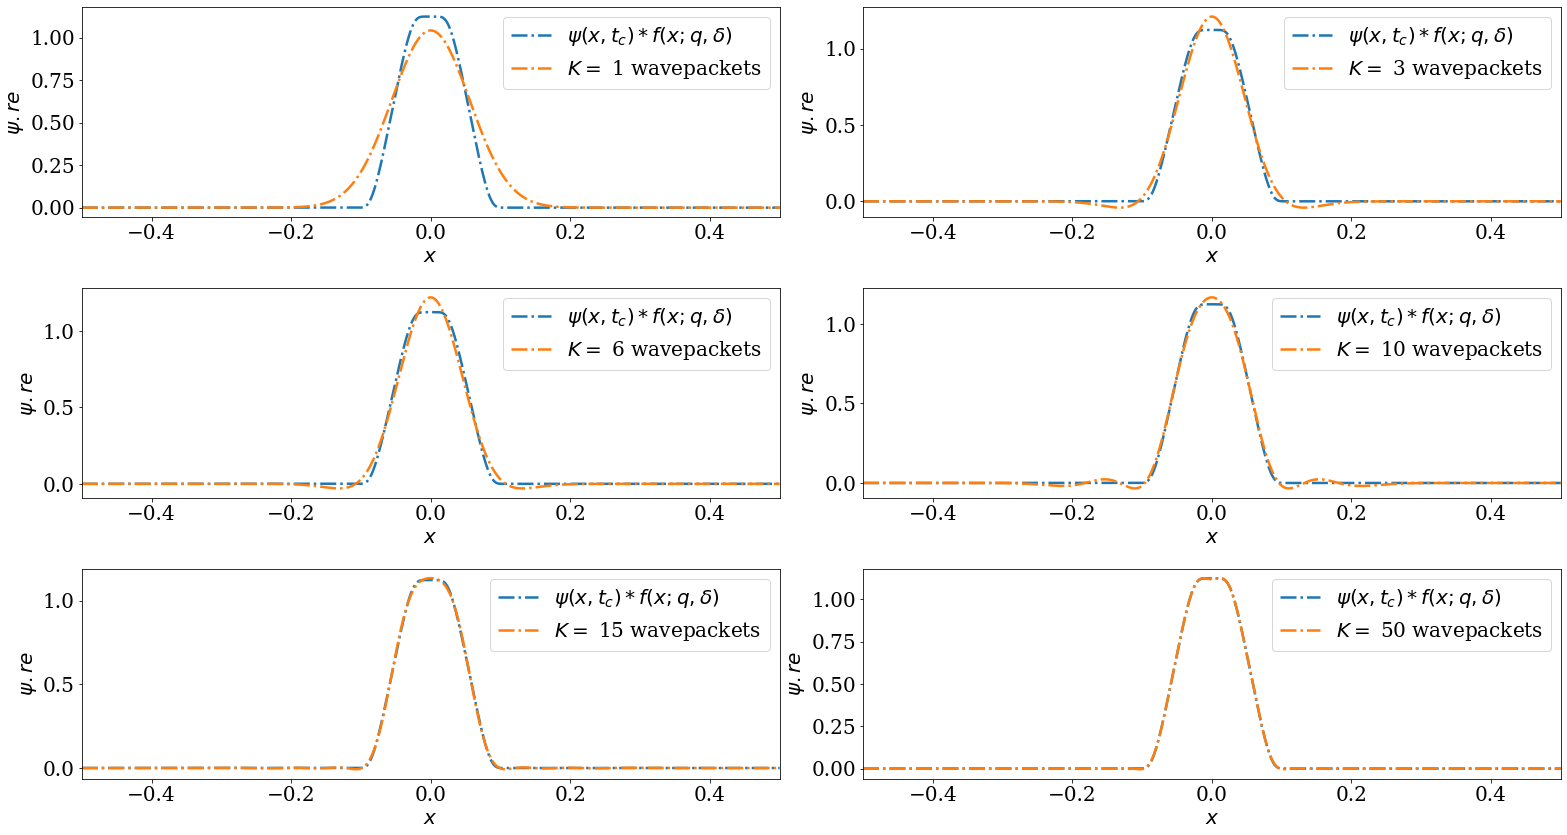

In [40]:
fig, ax = plt.subplots(3,2, figsize = (22,12))
famc = families2[16]
ax[0,0].plot(x, (psi_tc.psi(x) * partition_f(x, famc.q, delta)).real, label = r'$\psi(x,t_c)*f(x; q, \delta)$')
ax[0,0].plot(x, famc.psi(x,1).real, label = r'$K =$ {} wavepackets'.format(1)) # plot it as a function of the number of wavepackets for different values of variance
ax[0,1].plot(x, (psi_tc.psi(x) * partition_f(x, famc.q, delta)).real, label = r'$\psi(x,t_c)*f(x; q, \delta)$')
ax[0,1].plot(x, famc.psi(x,3).real, label = r'$K =$ {} wavepackets'.format(3)) # plot it as a function of the number of wavepackets for different values of variance
ax[1,0].plot(x, (psi_tc.psi(x) * partition_f(x, famc.q, delta)).real, label = r'$\psi(x,t_c)*f(x; q, \delta)$')
ax[1,0].plot(x, famc.psi(x,6).real, label = r'$K =$ {} wavepackets'.format(6)) # plot it as a function of the number of wavepackets for different values of variance
ax[1,1].plot(x, (psi_tc.psi(x) * partition_f(x, famc.q, delta)).real, label = r'$\psi(x,t_c)*f(x; q, \delta)$')
ax[1,1].plot(x, famc.psi(x,10).real, label = r'$K =$ {} wavepackets'.format(10)) # plot it as a function of the number of wavepackets for different values of variance
ax[2,0].plot(x, (psi_tc.psi(x) * partition_f(x, famc.q, delta)).real, label = r'$\psi(x,t_c)*f(x; q, \delta)$')
ax[2,0].plot(x, famc.psi(x,15).real, label = r'$K =$ {} wavepackets'.format(15)) # plot it as a function of the number of wavepackets for different values of variance
ax[2,1].plot(x, (psi_tc.psi(x) * partition_f(x, famc.q, delta)).real, label = r'$\psi(x,t_c)*f(x; q, \delta)$')
ax[2,1].plot(x, famc.psi(x,50).real, label = r'$K =$ {} wavepackets'.format(50)) # plot it as a function of the number of wavepackets for different values of variance
for q in ax.ravel():
    q.legend()
plt.setp(ax, xlim=(famc.q - 0.5, famc.q + 0.5), xlabel=r'$x$', ylabel = r'$\psi.re$')
plt.tight_layout()
plt.show()

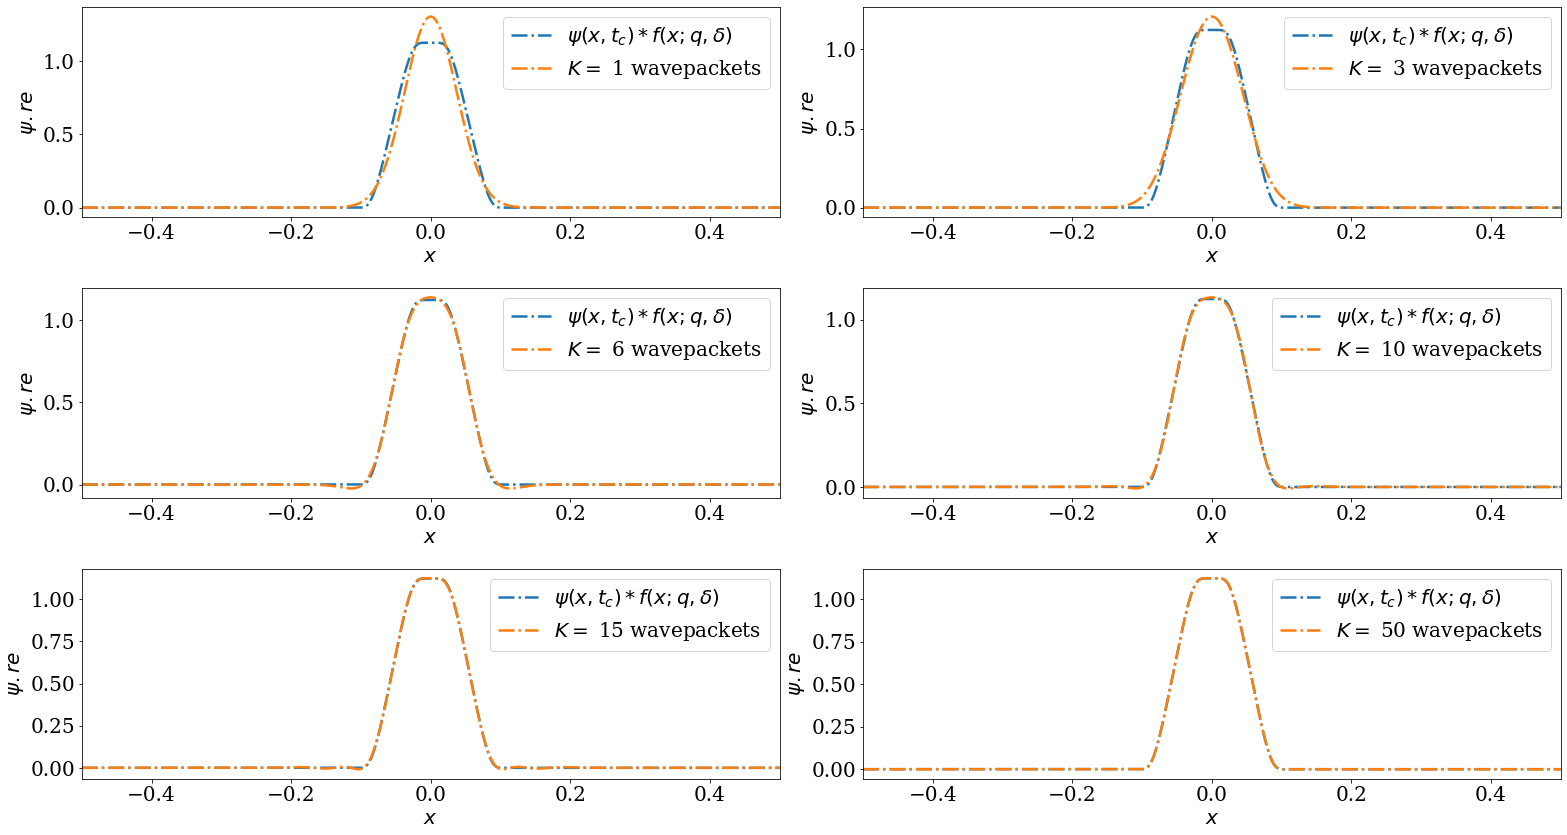

In [49]:
fig, ax = plt.subplots(3,2, figsize = (22,12))
famc = families3[16]
ax[0,0].plot(x, (psi_tc.psi(x) * partition_f(x, famc.q, delta)).real, label = r'$\psi(x,t_c)*f(x; q, \delta)$')
ax[0,0].plot(x, famc.psi(x,1).real, label = r'$K =$ {} wavepackets'.format(1)) # plot it as a function of the number of wavepackets for different values of variance
ax[0,1].plot(x, (psi_tc.psi(x) * partition_f(x, famc.q, delta)).real, label = r'$\psi(x,t_c)*f(x; q, \delta)$')
ax[0,1].plot(x, famc.psi(x,3).real, label = r'$K =$ {} wavepackets'.format(3)) # plot it as a function of the number of wavepackets for different values of variance
ax[1,0].plot(x, (psi_tc.psi(x) * partition_f(x, famc.q, delta)).real, label = r'$\psi(x,t_c)*f(x; q, \delta)$')
ax[1,0].plot(x, famc.psi(x,6).real, label = r'$K =$ {} wavepackets'.format(6)) # plot it as a function of the number of wavepackets for different values of variance
ax[1,1].plot(x, (psi_tc.psi(x) * partition_f(x, famc.q, delta)).real, label = r'$\psi(x,t_c)*f(x; q, \delta)$')
ax[1,1].plot(x, famc.psi(x,10).real, label = r'$K =$ {} wavepackets'.format(10)) # plot it as a function of the number of wavepackets for different values of variance
ax[2,0].plot(x, (psi_tc.psi(x) * partition_f(x, famc.q, delta)).real, label = r'$\psi(x,t_c)*f(x; q, \delta)$')
ax[2,0].plot(x, famc.psi(x,15).real, label = r'$K =$ {} wavepackets'.format(15)) # plot it as a function of the number of wavepackets for different values of variance
ax[2,1].plot(x, (psi_tc.psi(x) * partition_f(x, famc.q, delta)).real, label = r'$\psi(x,t_c)*f(x; q, \delta)$')
ax[2,1].plot(x, famc.psi(x,50).real, label = r'$K =$ {} wavepackets'.format(50)) # plot it as a function of the number of wavepackets for different values of variance
for q in ax.ravel():
    q.legend()
plt.setp(ax, xlim=(famc.q - 0.5, famc.q + 0.5), xlabel=r'$x$', ylabel = r'$\psi.re$')
plt.tight_layout()
plt.show()

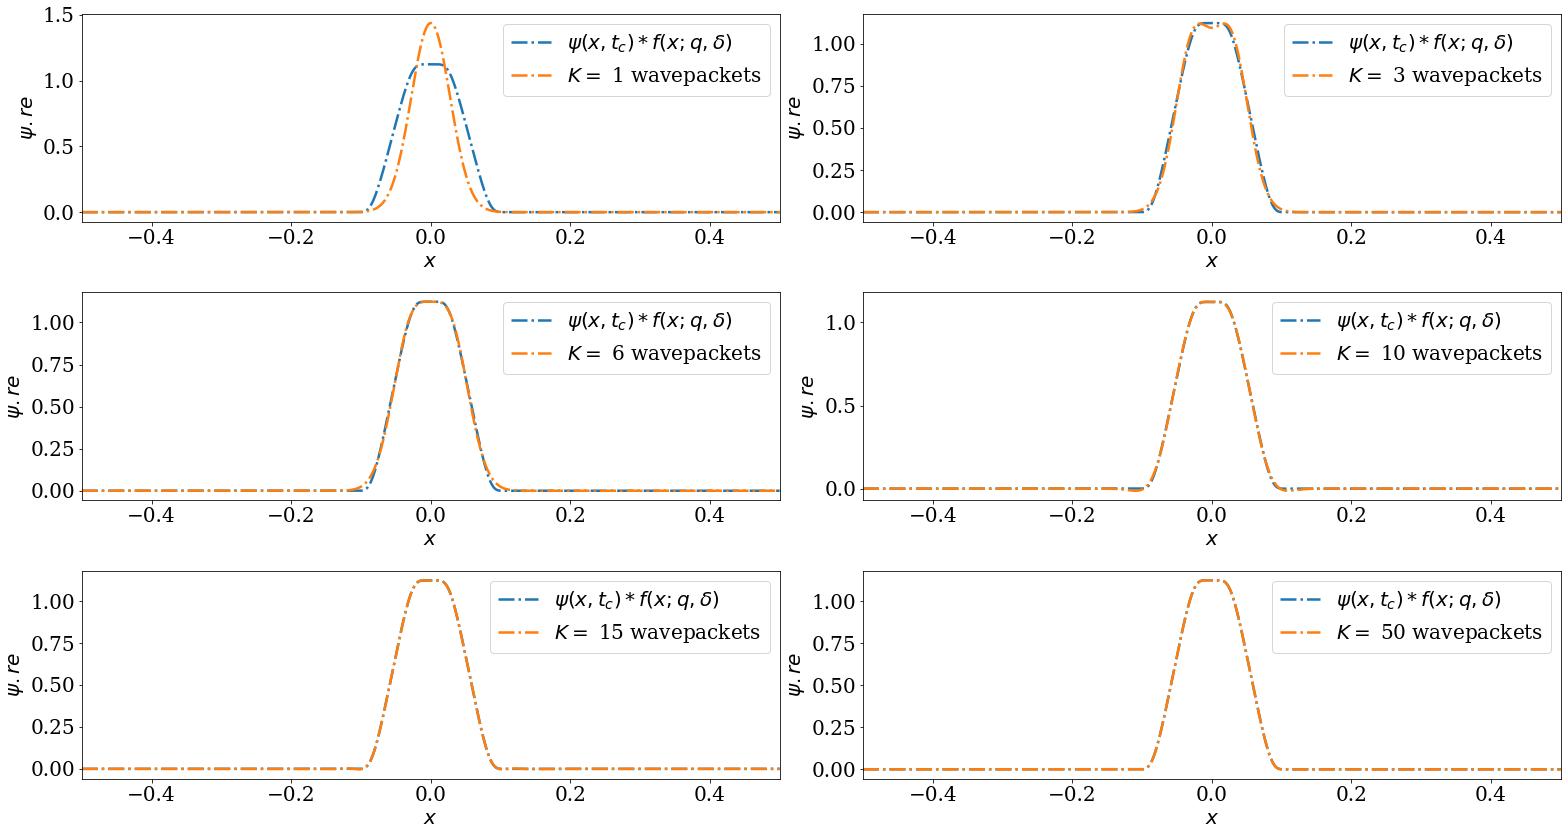

In [12]:
fig, ax = plt.subplots(3,2, figsize = (22,12))
famc = families4[16]
ax[0,0].plot(x, (psi_tc.psi(x) * partition_f(x, famc.q, delta)).real, label = r'$\psi(x,t_c)*f(x; q, \delta)$')
ax[0,0].plot(x, famc.psi(x,1).real, label = r'$K =$ {} wavepackets'.format(1)) # plot it as a function of the number of wavepackets for different values of variance
ax[0,1].plot(x, (psi_tc.psi(x) * partition_f(x, famc.q, delta)).real, label = r'$\psi(x,t_c)*f(x; q, \delta)$')
ax[0,1].plot(x, famc.psi(x,3).real, label = r'$K =$ {} wavepackets'.format(3)) # plot it as a function of the number of wavepackets for different values of variance
ax[1,0].plot(x, (psi_tc.psi(x) * partition_f(x, famc.q, delta)).real, label = r'$\psi(x,t_c)*f(x; q, \delta)$')
ax[1,0].plot(x, famc.psi(x,6).real, label = r'$K =$ {} wavepackets'.format(6)) # plot it as a function of the number of wavepackets for different values of variance
ax[1,1].plot(x, (psi_tc.psi(x) * partition_f(x, famc.q, delta)).real, label = r'$\psi(x,t_c)*f(x; q, \delta)$')
ax[1,1].plot(x, famc.psi(x,10).real, label = r'$K =$ {} wavepackets'.format(10)) # plot it as a function of the number of wavepackets for different values of variance
ax[2,0].plot(x, (psi_tc.psi(x) * partition_f(x, famc.q, delta)).real, label = r'$\psi(x,t_c)*f(x; q, \delta)$')
ax[2,0].plot(x, famc.psi(x,15).real, label = r'$K =$ {} wavepackets'.format(15)) # plot it as a function of the number of wavepackets for different values of variance
ax[2,1].plot(x, (psi_tc.psi(x) * partition_f(x, famc.q, delta)).real, label = r'$\psi(x,t_c)*f(x; q, \delta)$')
ax[2,1].plot(x, famc.psi(x,50).real, label = r'$K =$ {} wavepackets'.format(50)) # plot it as a function of the number of wavepackets for different values of variance
for q in ax.ravel():
    q.legend()
plt.setp(ax, xlim=(famc.q - 0.5, famc.q + 0.5), xlabel=r'$x$', ylabel = r'$\psi.re$')
plt.tight_layout()
plt.show()

variance is 0.20000000000000007


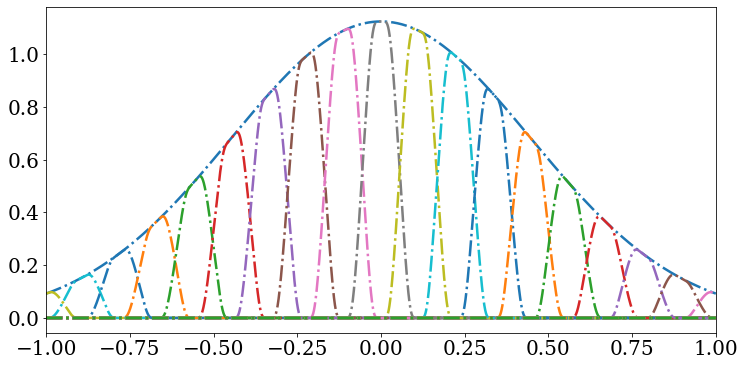

In [22]:
plt.plot(x,psi_tc.psi(x).real)
for Hag in families:
    plt.plot(x, Hag.psi(x).real)
plt.xlim((-1,1))
# variance is EPS * (QQ*) - increase the variance by scaling Q (adjusting P correspondingly)
print("variance is", var)

(-1.5, 1.5)

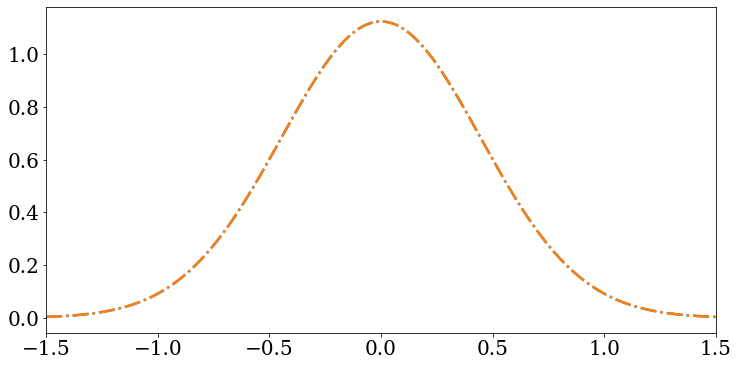

In [12]:
plt.plot(x,psi_tc.psi(x).real)
sol = np.zeros(x.shape, dtype=np.complex128)
for Hag in families:
    sol += Hag.psi(x)
plt.plot(x, sol.real)
plt.xlim((-1.5,1.5))
#plt.plot(x,g.imag)

variance is 0.20000000000000007


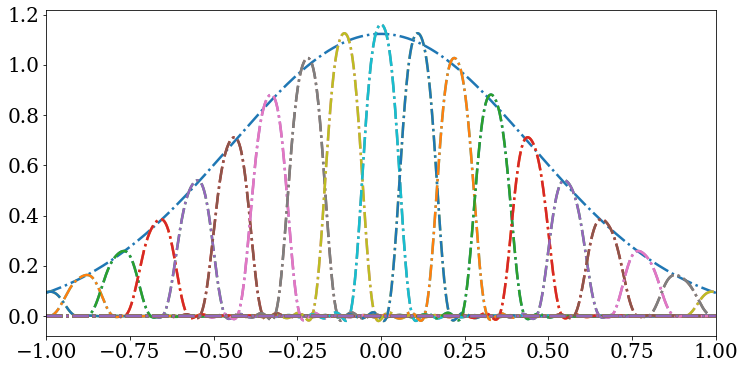

In [23]:
plt.plot(x,psi_tc.psi(x).real)
for Hag in families1:
    plt.plot(x, Hag.psi(x).real)
plt.xlim((-1,1))
# variance is EPS * (QQ*) - increase the variance by scaling Q (adjusting P correspondingly)
print("variance is", var)

(-1.5, 1.5)

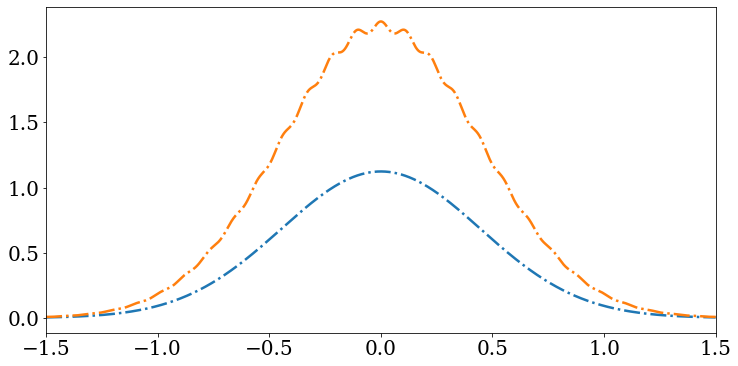

In [24]:
plt.plot(x,psi_tc.psi(x).real)
sol = np.zeros(x.shape, dtype=np.complex128)
for Hag in families1:
    sol += Hag.psi(x)
plt.plot(x, sol.real)
plt.xlim((-1.5,1.5))
#plt.plot(x,g.imag)

To check: but probably it is just a case of needing more wavepackets

If I rescale the variance by a factor $\gamma$ ($\gamma*Q$), then I need to scale $P$ by ... in order for the 
symplectic relations to be satisfied, which among other things ensure normalisation.

The method seems to converge by increasing the number of Hagedorn wavepackets and yet the approximation is worse than if I use less wavepackets. Is there some magical cancellation going on?

Do also parameter study as a function of standard deviation?

If I change the variance, the peak changes for the gaussian, so how do 
I choose the variance such that the peak agrees?

## Projection 

### 1) Projection onto Gaussians - unique but ill-conditioned

### 2) Projection onto Hagedorn family - not unique and ill-conditioned (??)

### 1) Projection onto Gaussians 

Perhaps, introduce first the system of linear equations that you would like to solve so that it is clear what the RHS (the "data") would represent. The perturbation would come from the machine precision error or from solving the RHS integrals ? analytically. THE PROBLEM IS SENSITIVITY TO IMPERFECTION IN THE DATA (OR MACHINE PRECISION ERROR)

Once again consider a wide wavepacket at the crossing $\psi(x,t_c)$ and consider a basis of Gaussian functions to approximate it of smaller variance, i.e. 
$$ 
    \psi(x, t_c) 
    =
    \sum_{q \in \Gamma_q}
    a_q \varphi_0[\Pi_q]
$$
where the equality  holds in the $L^2$ norm
So, how do we find the coefficients $a_q$ s.t. the $L^2$ error is minimised?
Multiply both sides by $\overline{\varphi_0}[\Pi_i]$ and integrate
$$
    \langle 
        \varphi_0[\Pi_i], \psi(x, t_c) 
    \rangle
    =
    a_i + \sum_{q \in \Gamma_q \setminus i}
    a_q
    \langle 
        \varphi_0[\Pi_i], \varphi_0[\Pi_q]  
    \rangle
$$
If we consider $N$ basis functions, we then obtain the following system of equations 
\begin{align*}
    \begin{bmatrix}
        \langle 
            \varphi_0[\Pi_1], \psi(x, t_c) 
        \rangle
        \\
        \langle 
            \varphi_0[\Pi_2], \psi(x, t_c) 
        \rangle
        \\
        \cdots
        \\
        \langle 
            \varphi_0[\Pi_N], \psi(x, t_c) 
        \rangle
    \end{bmatrix}
    =
    \begin{bmatrix}
        \langle 
        \varphi_0[\Pi_1], \varphi_0[\Pi_1]  
        \rangle
        &
        \langle 
        \varphi_0[\Pi_1], \varphi_0[\Pi_2]  
        \rangle
        &
        \cdots
        &
        \langle 
        \varphi_0[\Pi_1], \varphi_0[\Pi_N]  
        \rangle
        \\
        \langle 
        \varphi_0[\Pi_2], \varphi_0[\Pi_1]  
        \rangle
        &
        \langle 
        \varphi_0[\Pi_2], \varphi_0[\Pi_2]  
        \rangle
        &
        \cdots
        &
        \langle 
        \varphi_0[\Pi_2], \varphi_0[\Pi_N]  
        \rangle
        \\
        \cdots
        \\
         \langle 
        \varphi_0[\Pi_N], \varphi_0[\Pi_1]  
        \rangle
    \end{bmatrix}
     \begin{bmatrix}
        a_1
        \\
        a_2
        \\
        \cdots
        \\
        a_N
    \end{bmatrix}
\end{align*}
The above is just a system of linear equations which we re-write as 
$$b = A x$$
where we note that $A = A^{H}$ (hermitian matrix). 
Moreover $b$ can be computed analytically if $\psi(x, t_c)$ is a Gaussian or even a Hagedorn wavepacket.

Now, if the only problem is that the matrix is not invertible then we could consider only the Pseudo-Inverse. Can it be non-invertible and ill-conditioned?

**Ill-conditioned matrices**

Consider the two system of linear equations
\begin{align*}
    \begin{bmatrix}
        1 & 1000
        \\
        0 & 1
    \end{bmatrix}
    \begin{bmatrix}
        x_1
        \\
        x_2
    \end{bmatrix}
    =
    \begin{bmatrix}
        1
        \\
        0
    \end{bmatrix}
    \hspace{1cm}
        \begin{bmatrix}
        1 & 1000
        \\
        0 & 1
    \end{bmatrix}
    \begin{bmatrix}
        y_1
        \\
        y_2
    \end{bmatrix}
    =
    \begin{bmatrix}
        1
        \\
        0.01
    \end{bmatrix}
\end{align*}
Although the two system differ only by a relatively small perturbation in the RHS, they have two very different answers
\begin{align*}
    \begin{bmatrix}
        x_1
        \\
        x_2
    \end{bmatrix}
    =
    \begin{bmatrix}
        1
        \\
        0
    \end{bmatrix}
\hspace{1cm}
    \begin{bmatrix}
        y_1
        \\
        y_2
    \end{bmatrix}
    =
    \begin{bmatrix}
        -9
        \\
        0.01
    \end{bmatrix}
\end{align*}

1. Changing entry $A_{1,0}$ from 0 to 0.001 makes the determinant zero and the 
evalues 0,2. 
2. ration of singular values (see SVD)

One important point that needs be emphasised is that the problem has in theory a unique solution since the matrix is invertible (but nearly degenerate?). And so it is a practical problem stemming from the fact that the data has 

In [98]:
import numpy as np

A = np.array([[1, 1000], [0 ,1]])
b = np.array([1,0])
evals, evec = np.linalg.eig(A)
print(A @ evec[:,0].reshape(2,1))
print(A @ evec[:,1].reshape(2,1))

[[1.]
 [0.]]
[[-1.00000000e+00]
 [ 2.22044605e-19]]


How can we measure this instability? i.e. some systems of linear equations/matrices are more prone to this instability than others. 

**Condition number**

Is the following true: a system of linear equations is sensitive to a perturbation of the RHS iff it is w.r.t. a perturbation to the elements of its matrix. 

What motivates the condition number $\kappa(A) = \text{cond}(A) = \|A\| \cdot \|A^{-1}\| = \sigma / \sigma_N$ where $\|A\| = \|A\|_2 = \sigma_1$ = maximum singular value of $A$ (?) (this defition comes from the bound on the following meaningful metric)

The following number says something meaningful:

$$ \frac{\|\delta x\| / \|x\|}{\|\delta b \| / \|b\|} $$

because it says the following:
- If I change the RHS relatively negligibly, then either $\|\delta x\|$ is relatively large with respect $\|x\|$ and so we have an instability issue
or it is relatively small and we do not have this issue. 
- If I change the RHS relatively largely, then perhaps a relatively large $\|\delta x\|$ is expected. 
- The benchmark for the condition number is 1, which is the condition number of 
unitary matrices.

Now, since one can show that 
$$ \|\delta x\| / \|x\| \leq \|A\|\|A^{-1}\| \|\delta b \| / \|b\|$$
and this bound is quite tight presumably (we want it to capture this behaviour), one defines the condition number as 
$$ \kappa(A) = \|A\|\|A^{-1}\| $$ 

- The inequality should hold for any choice of norm
The important observation is that it can not be better than 1.

In [34]:
# condition number for matrix A
print("2-norm condition number", np.linalg.cond(A))
print("Frobenious condition number", np.linalg.cond(A, p='fro'))
print("2-norm condition number", np.linalg.cond(np.eye(4)))
print("Frobenious condition number", np.linalg.cond(np.eye(4), p='fro'))
np.linalg.norm(np.eye(2), 'fro')

2-norm condition number 1000001.9999990001
Frobenious condition number 1000002.0
2-norm condition number 1.0
Frobenious condition number 4.0


1.4142135623730951

In [39]:
print("2-norm condition number", np.linalg.cond(A))
print("Solution to Ax = b is ", np.linalg.solve(A,b))
print("Solution to Ax = b + 0.01 ", np.linalg.solve(A,b + 0.01))

2-norm condition number 1000001.9999990001
Solution to Ax = b is  [1. 0.]
Solution to Ax = b + 0.01  [-8.99  0.01]


In [165]:
lam = 0.003
A_new = np.concatenate((A, lam*np.eye(2)), axis = 0)
b_new = np.concatenate((b + np.array([0,0.01]), np.array([0,0])), axis = 0).reshape(4,1)
print(A_new)
print(b_new)

[[1.e+00 1.e+03]
 [0.e+00 1.e+00]
 [3.e-03 0.e+00]
 [0.e+00 3.e-03]]
[[1.  ]
 [0.01]
 [0.  ]
 [0.  ]]


In [166]:
print("Solution to Ax = b is ", 
        np.linalg.pinv(A_new) @ b_new)
print("Ax ", 
        A @ (np.linalg.pinv(A_new) @ b_new))

Solution to Ax = b is  [[-0.89999748]
 [ 0.00190001]]
Ax  [[1.0000081 ]
 [0.00190001]]


Add a plot that shows how as a function of lambda, you get different solutions but they are mapped to rougly the same b

The Frobenius-norm scales with the size of the matrix but not the 2-norm which we prefer. The other way around is that you just divide the Frobenius condition number by the dimension.

**Is there anything we can do -> regularisation**

There are different approaches:
1. SVD truncation 
2. Tikhonov Regularisation (most commonly used approach)

1. The solution to this regularised problem roughly matches the desired solution
2. It is less sensitive to perturbations
3. Has a parameter that allows bias-variance trade-off.

**Tikhonov Regularisation**

 FBI transform ([Lasser et al. ``The Gaussian wavepacket transform via quadrature rules"](https://arxiv.org/pdf/2010.03478v1.pdf) - also based on a partition of unity of Gaussian functions)
